<a href="https://colab.research.google.com/github/Aparna786711/Deep_learning/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open In Colab

# Change runtime to GPU
1. Runtime>Change Runtime Type




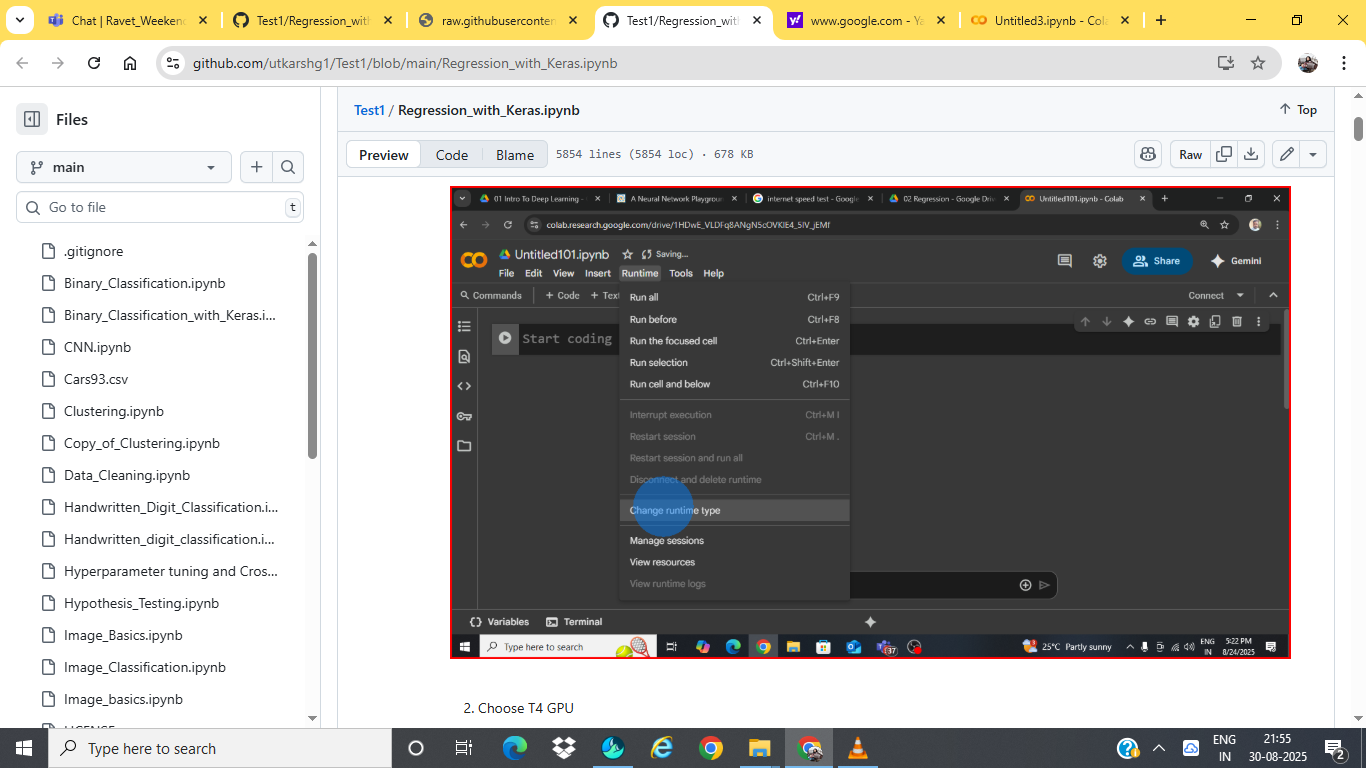


2. Choose T4 GPU


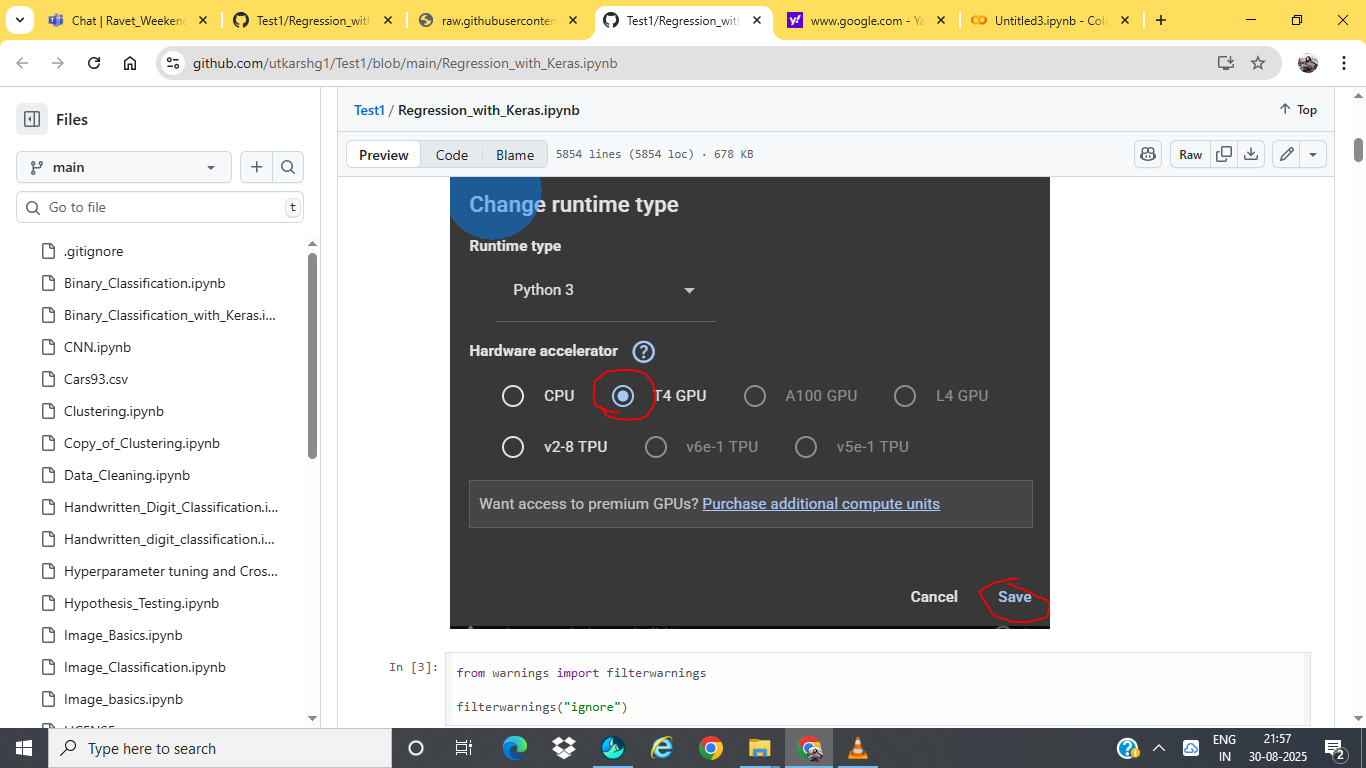


In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")



In [ ]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)



https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


# Step 1 - Data Ingestsion


In [ ]:
import pandas as pd
df = pd.read_csv(url1)
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Featuer names

1. AT - Atmospheric Temperature in degree celsius
2. V - Vacuum Pressure in Pascals
3. AP - Atmosphric pressure in pascals
4. RH - Relative Humidity in Percentage
5. Target = PE - Power Output in Mega Watts


## Step 2 - Perform basic data quality checks


In [ ]:
df.shape


(9568, 5)

In [ ]:
df.duplicated().sum()


np.int64(41)

In [ ]:
# Drop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape


(9527, 5)

In [ ]:
df.isna().sum()


,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)


In [ ]:
X = df.drop(columns=["PE"])
Y = df["PE"]


In [ ]:
X.head()


,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()


,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Apply preprocessing on X


In [ ]:
X.dtypes


,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")



In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()


,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [ ]:
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

## **Apply** train test split


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)


In [ ]:
xtrain.head()


,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()


,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [ ]:
xtest.head()


,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()


,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
xtrain.shape


(7621, 4)

In [ ]:
xtest.shape


(1906, 4)

In [ ]:
xtrain.shape[1]


4

# Step 6 - Build a neural network


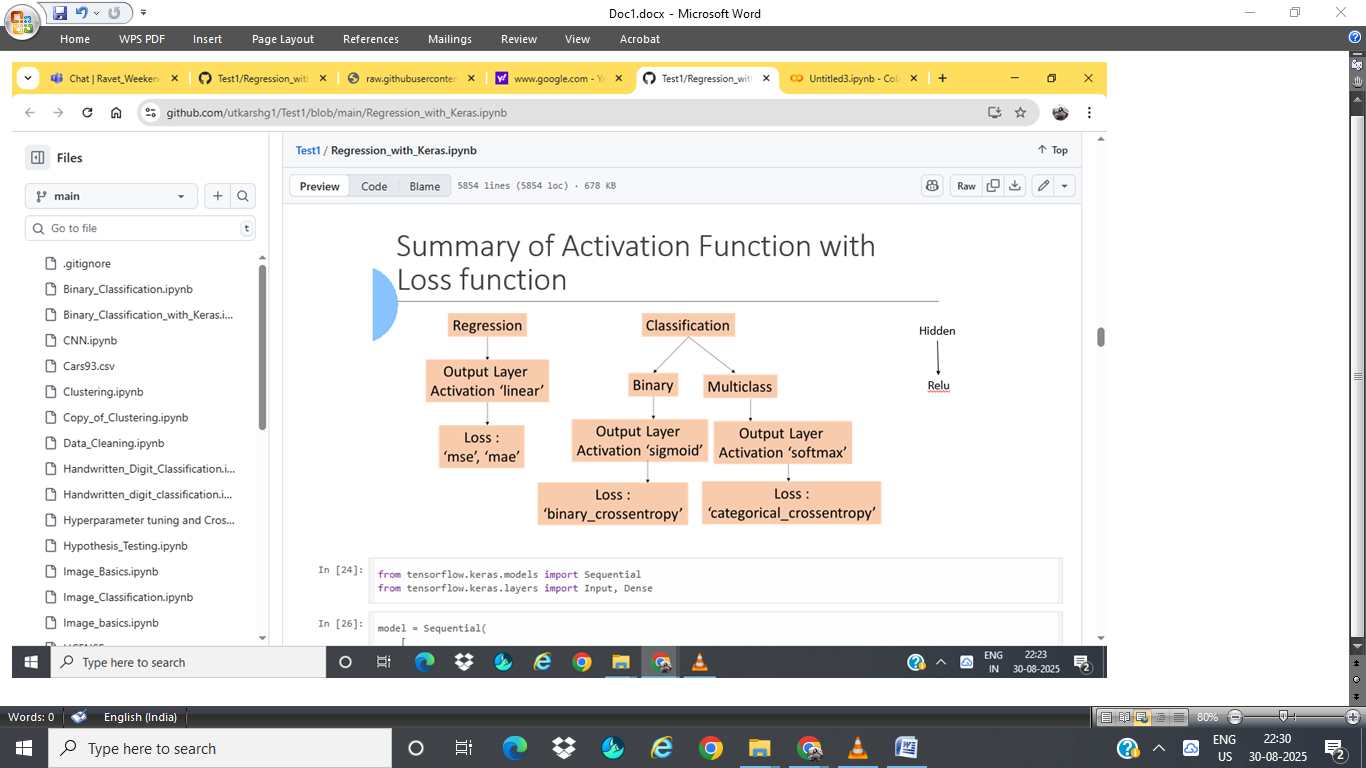

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense


In [ ]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1], )),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])


In [ ]:
# Fit the model
history = model.fit(xtrain, ytrain, epochs=60, validation_split=0.1)


Epoch 1/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 205906.5156 - mae: 453.4622 - val_loss: 203921.0312 - val_mae: 451.2827
Epoch 2/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203462.3594 - mae: 450.7791 - val_loss: 197394.2656 - val_mae: 444.0091
Epoch 3/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 194099.1719 - mae: 440.2567 - val_loss: 175769.5938 - val_mae: 418.8011
Epoch 4/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 166987.3750 - mae: 407.8746 - val_loss: 133079.2500 - val_mae: 362.6764
Epoch 5/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120747.4297 - mae: 343.9689 - val_loss: 82448.5625 - val_mae: 277.5044
Epoch 6/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71884.9141 - mae: 255.3842 - val_loss: 46184.4727 - val_mae: 194.0914
Epoch 7/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 40781.5430 - mae: 180.3256 - val_loss: 29532.2363 - val_mae: 149.1392
Epoch 8/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26013.2441 - mae: 13

In [ ]:
history.history["loss"]


[205838.453125,
 201866.640625,
 189108.453125,
 156774.6875,
 108282.9765625,
 63082.9765625,
 36258.125,
 24669.220703125,
 19475.3203125,
 16140.1494140625,
 13188.7275390625,
 10505.919921875,
 8268.3017578125,
 6281.0078125,
 4611.61669921875,
 3316.994140625,
 2367.408203125,
 1700.0689697265625,
 1239.009521484375,
 919.33837890625,
 693.2758178710938,
 532.2816162109375,
 411.80096435546875,
 318.3611145019531,
 243.7333221435547,
 185.66265869140625,
 141.57415771484375,
 108.22698211669922,
 83.85950469970703,
 66.13980102539062,
 53.63240051269531,
 45.11700439453125,
 38.983245849609375,
 34.69790267944336,
 31.508956909179688,
 29.04307746887207,
 27.332841873168945,
 25.898578643798828,
 24.879337310791016,
 23.96510887145996,
 23.401390075683594,
 22.866064071655273,
 22.570404052734375,
 22.257400512695312,
 22.123981475830078,
 21.902620315551758,
 21.688329696655273,
 21.625991821289062,
 21.43853759765625,
 21.49809455871582,
 21.363962173461914,
 21.3049373626709,
 

In [ ]:
history.history["val_loss"]


[203921.03125,
 197394.265625,
 175769.59375,
 133079.25,
 82448.5625,
 46184.47265625,
 29532.236328125,
 22767.779296875,
 18969.7578125,
 15807.712890625,
 12743.7958984375,
 10136.0986328125,
 7846.55615234375,
 5859.822265625,
 4265.6201171875,
 3078.78173828125,
 2219.780029296875,
 1619.693115234375,
 1201.409912109375,
 906.0316162109375,
 697.3565673828125,
 545.5526733398438,
 424.93023681640625,
 330.2215270996094,
 253.72264099121094,
 195.8338623046875,
 148.942138671875,
 116.1508560180664,
 88.5032958984375,
 70.23872375488281,
 58.584007263183594,
 47.62163543701172,
 41.08150863647461,
 35.9062385559082,
 32.27650833129883,
 29.48480987548828,
 27.453189849853516,
 25.191251754760742,
 24.071622848510742,
 22.83478546142578,
 21.758424758911133,
 21.389005661010742,
 20.956188201904297,
 20.735017776489258,
 19.9517765045166,
 19.936479568481445,
 20.055816650390625,
 19.71390724182129,
 19.36805534362793,
 19.120830535888672,
 19.609233856201172,
 19.39868927001953,
 

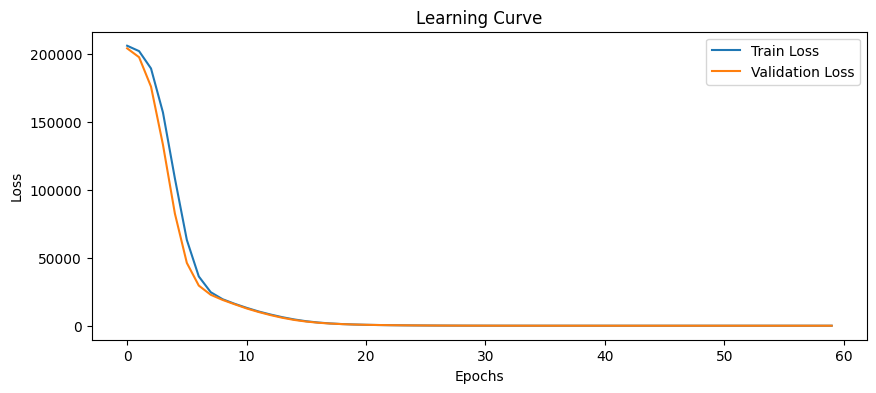

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()


##Get the model weights


In [ ]:
weights = model.get_weights()
weights



[array([[-0.9840826 ,  0.20655885, -0.26257122,  0.63866156,  1.0295676 ,
         -0.37071216, -0.24444906, -0.9928583 ],
        [-0.7026175 ,  0.73931295, -1.2287036 ,  0.10399421,  0.526539  ,
          0.79130495,  0.9011642 , -1.4670398 ],
        [ 0.62435234, -0.6007812 ,  0.7706324 , -0.20319752, -0.3046021 ,
         -0.30304646,  0.32073453, -0.620709  ],
        [ 0.4016504 ,  0.15266873, -0.38633856, -0.9649656 ,  1.0698097 ,
         -0.28575888, -0.11612405,  0.20169438]], dtype=float32),
 array([4.0750747, 3.7928646, 4.0473194, 3.9180243, 3.7696388, 3.3517036,
        3.0339825, 4.0449214], dtype=float32),
 array([[ 0.13796793,  0.15019536,  2.5864    ,  1.8582118 ],
        [-0.4153435 ,  0.3414245 ,  2.4385598 ,  2.156287  ],
        [-0.55954915, -0.5180071 ,  2.8967323 ,  3.2218103 ],
        [ 0.32587472,  0.05526771,  2.457983  ,  2.1398425 ],
        [-0.41730773, -0.42991507,  2.5833907 ,  2.0310018 ],
        [-0.7219519 , -0.5928565 ,  2.2569344 ,  2.7958298 ]

## Step 7 - Model evaluation


In [ ]:
train_mse, train_mae = model.evaluate(xtrain, ytrain)
print(f"Train MSE : {train_mse:.2f}")
print(f"Train MAE : {train_mae:.2f}")



239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.8459 - mae: 3.6072
Train MSE : 20.99
Train MAE : 3.60


In [ ]:
test_mse, test_mae = model.evaluate(xtest, ytest)
print(f"Test MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.5879 - mae: 3.5342
Test MSE : 20.88
Test MAE : 3.62


In [ ]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)


In [ ]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")



In [ ]:
print("Training Results : ")
evaluate_model(model, xtrain, ytrain)


Training Results : 
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RMSE : 4.58
MAE : 3.60
MAPE : 0.79%
R2 : 92.70%


In [ ]:
print("Testing Results : ")
evaluate_model(model, xtest, ytest)


Testing Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE : 4.57
MAE : 3.62
MAPE : 0.80%
R2 : 93.08%


##From above results the model is good because r2 score > 0.8 for both train and test


## Step 8 - Out of Sample prediction


In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [ ]:
xnew = pd.read_csv(url2)
xnew.head()


,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
num_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()


,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [ ]:
xnew_pre.shape


(100, 4)

In [ ]:
preds = model.predict(xnew_pre)
preds[0:5]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[445.6327 ],
       [438.23483],
       [430.53668],
       [439.8513 ],
       [473.72507]], dtype=float32)

In [ ]:
xnew["PE_pred"] = preds.round(2)


In [ ]:
xnew


,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.630005
1,28.88,54.89,1007.16,46.60,438.230011
2,27.89,73.21,1001.32,85.88,430.540009
3,25.69,62.26,1011.38,74.08,439.850006
4,12.16,40.81,1025.79,70.97,473.730011
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.959991
96,11.78,39.96,1011.37,82.95,472.100006
97,5.62,41.38,1020.91,86.21,484.450012
98,24.96,74.99,1008.25,80.52,437.170013


In [ ]:
xnew.to_csv("results.csv", index=False)


# Step 9 - Saving and loading model


In [ ]:
model.save("plant_model.keras")


In [ ]:
import joblib

joblib.dump(num_pipe, "pre.joblib")


['pre.joblib']

##Loading preprocessor and model


In [ ]:
p = joblib.load("pre.joblib")
p


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from tensorflow.keras.models import load_model

m = load_model("plant_model.keras")
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [ ]:
m.evaluate(xtrain, ytrain)


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.8459 - mae: 3.6072


[20.994709014892578, 3.597618341445923]

In [ ]:
m.evaluate(xtest, ytest)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5879 - mae: 3.5342


[20.87709617614746, 3.6191084384918213]